# Chapter 2. Supervised Learning

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

[Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) is used when we want to predict a certain outcome from a given input, and we have examples of input/output pairs.

## Classification and Regression

There are two major types of supervised machine learning problems, called [classification](https://en.wikipedia.org/wiki/Statistical_classification) and [regression](https://en.wikipedia.org/wiki/Regression_analysis).

In classification, the goal is to predit a *class label*, which is a choice from a predefined list of possibilities.  
In chapter 1 we used the example of classifying irises into one of three possible species.  
Classification is sometimes separated into *binary classification*, which is the special case of distinguishing between exactly two classes, and *multiclass classification*, which is classification between more than two classes.

For regression tasks, the goal is to predict a continuous number, a floating-point number, or a real number.  
Predicting a person's annual income from their education, their age, and where they live is an example of a regression task.  
When predicting income, the predicted value is an amount and can be any number in a given range.  
Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm.  
The yield again can be an arbitrary number.

An easy way to distinguish between classification and regression tasks is to ask whether there is some kind of continuity in the output.  
If there is continuity between possible outcomes, then the problem is a regression problem.  
Think about predicting annual income -- there is clear continuity in the output.  
Whether a person makes $50,000 or $50,001 per year doesn't make much difference, even though they are technically different dollar amounts.  
By contrast, recognizing which language a book is written in is a classification problem because there is no matter of degree.  
The book is written in English, or Arabic, or French, or some other language; there is no continuity between languages and there is no language that is *between* Arabic and French.

## Generalization, Overfitting, and Underfitting

We want to build a model that is able to generalize as accurately as possible.  
Building a model that is too complex for the amount of information available is called [overfitting](https://en.wikipedia.org/wiki/Overfitting).  
Overfitting occurs when you fit a model too closely to the particularities of the training set and come up with a model that works well on that training set but is not able to generalize to new data.  
On the other hand, if your model is too simple or whose scope is too broadly defined, then you might not be able to capture all the aspects of and variability in the data.  
This is known as [underfitting](https://en.wikipedia.org/wiki/Overfitting#Underfitting), and will result in your model performing poorly on both the training and test sets because it cannot capture the underlying trend of the data.  
You can learn more about underfitting vs. overfitting [in the scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).

### Relation of Model Complexity to Dataset Size

It's important to note that model complexity is initmately tied to the variation of inputs contained in your training dataset.  
The larger the variety of data points that your dataset contains, the more complex a model you can use without overfitting.  
Usually, collecting more data points will yield more variety, so larger datasets allow you to build more complex models.  
In the real world, you often have the ability to decide how much data to collect, which might be more beneficial than tweaking and tuning your model.  

## Supervised Machine Learning Algorithms

This is where the fun begins.  
We will now review the most popular machine learning algorithms and explain how they learn from data and how they make predictions.  
This chapter can be used as a reference guide for the rest of the book.

### Some Sample Datasets

We will be using several different datasets to illustrate the various algorithms.  
Many of the algorithms will have a classification and a regression variant, and we will describe both.  

An example of a synthetic (made-up) two-class (binary) classification dataset is the `forge` dataset from the `mglearn` module.  
The following code creates a scatter plot visualizing all of the data points in the dataset.  
The plot has the first (of two) feature on the x-axis and the second feature on the y-axis.  
Each data point is represented as one dot, and the color and shape of the dot indicates its class:

In [98]:
# Generate dataset
X, y = mglearn.datasets.make_forge()
print("X:")
print(X)
print("y:")
print(y)

X:
[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]
 [  8.30988863   4.80623966]
 [ 11.93027136   4.64866327]
 [  9.67284681  -0.20283165]
 [  8.34810316   5.13415623]
 [  8.67494727   4.47573059]
 [  9.17748385   5.09283177]
 [ 10.24028948   2.45544401]
 [  8.68937095   1.48709629]
 [  8.92229526  -0.63993225]
 [  9.49123469   4.33224792]
 [  9.25694192   5.13284858]
 [  7.99815287   4.8525051 ]
 [  8.18378052   1.29564214]
 [  8.7337095    2.49162431]
 [  9.32298256   5.09840649]
 [ 10.06393839   0.99078055]
 [  9.50048972  -0.26430318]
 [  8.34468785   1.63824349]
 [  9.50169345   1.93824624]
 [  9.15072323   5.49832246]
 [ 11.563957     1.3389402 ]]
y:
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X.shape: 
(26, 2)


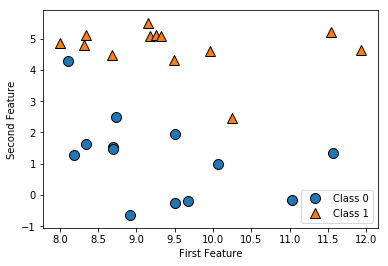

In [99]:
# Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: \n{}".format(X.shape))

As you can see from `X.shape`, this dataset consists of 26 data points, with 2 features.

To illustrate regression algorithms, we will use the `synthetic wave` dataset from the `mglearn` module.  
The `wave` dataset has a single input feature and a continuous target variable (or *response*) that we want to model.  
The plot created below shows the single feature on the x-axis and the regression target (the output) on the y-axis.  

X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
y:
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4

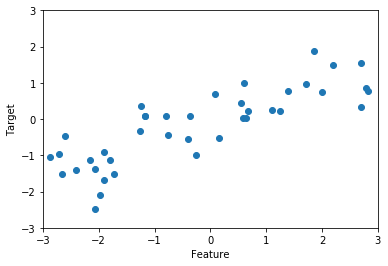

In [100]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print("X:")
print(X)
print("y:")
print(y)
plt.plot(X, y, 'o')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

We are using these very simple, low-dimensional datasets because we can easily visualize them.

We will complement these small synthetic datasets with two real-world datasets that are included in `scikit-learn`.  
One is the [Wisconsin Breast Cancer dataset](http://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-database) (aka `cancer`), which records clinical measurements of breast cancer tumors.  
Each tumor is labeled as "benign" or "malignant", and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.  
The data can be loaded using the `load_breast_cancer` function from `scikit-learn`:

In [101]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [102]:
display(cancer)

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

**Note**  
Datasets that are included in `scikit-learn` are usually stored as [Bunch objects](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/base.py), which contain some information about the dataset as well as the actual data.  
The most important thing to know about `Bunch` objects is that they behave like Python dictionaries, with the added benefit of accessing values using a dot (as in `bunch.key` instead of `bunch['key']`).

The dataset consists of 569 data points, with 30 features each:

In [103]:
print("Shape of cancer data: \n{}".format(cancer.data.shape))

Shape of cancer data: 
(569, 30)


Of these 569 data points, 212 are labeled as malignant and 357 as benign:

In [104]:
print("Sample counts per class: \n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


To get a description of the semantic meaning of each feature, we can have a look at the `feature_names` attribute:

In [105]:
print ("Feature names: \n{}".format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


You can find out more about the data by reading `cancer.DESCR` if you are interested.

In [106]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

We will also be using a real-world regression dataset, the [Boston Housing dataset](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).  
The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970's by using information such as crime rate, proximity to the Charles River, highway accessibility, and so on.  
The dataset contains 506 data points which are described by 13 features:

In [107]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: \n{}".format(boston.data.shape))

Data shape: 
(506, 13)


In [108]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called *interactions*) between features.  
In other words, we will not only consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility.  
Including derived features like these is called [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering), which will be discussed in more detail in Chapter 4.  
This derived dataset can be loaded using the `load_extended_boston` function:

In [109]:
X, y = mglearn.datasets.load_extended_boston()
print("X:")
print(X)
print("y:")
print(y)
print("X.shape: \n{}".format(X.shape))

X:
[[  0.00000000e+00   1.80000000e-01   6.78152493e-02 ...,   1.00000000e+00
    8.96799117e-02   8.04248656e-03]
 [  2.35922539e-04   0.00000000e+00   2.42302053e-01 ...,   1.00000000e+00
    2.04470199e-01   4.18080621e-02]
 [  2.35697744e-04   0.00000000e+00   2.42302053e-01 ...,   9.79579831e-01
    6.28144504e-02   4.02790570e-03]
 ..., 
 [  6.11892474e-04   0.00000000e+00   4.20454545e-01 ...,   1.00000000e+00
    1.07891832e-01   1.16406475e-02]
 [  1.16072990e-03   0.00000000e+00   4.20454545e-01 ...,   9.82676920e-01
    1.29930407e-01   1.71795127e-02]
 [  4.61841693e-04   0.00000000e+00   4.20454545e-01 ...,   1.00000000e+00
    1.69701987e-01   2.87987643e-02]]
y:
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20

The resulting 104 features are the 13 original features together with the 91 possible combinations of two features within those 13.  
We will use the above datasets to explain and illustrate the properties of the different machine learning algorithms.  
But for now, let's get to the algorithms themselves.  
First, we'll revisit the `k`-nearest neighbors (KNN) algorithm that we saw in the previous chapter.

### k-Nearest Neighbors

The KNN algorithm is arguably the simplest machine learning algorithm.  
Building the model consists only of storing the training dataset.  
To make a prediction for a new data point, the algorithm finds the `k` closest data points in the training set -- its "nearest neighbors".

#### k-Neighbors classification

In it s simplest version, the KNN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.  
The prediction is then simply the known output for this training point.  
Let's illustrate this for the case of classification on the `forge` dataset:

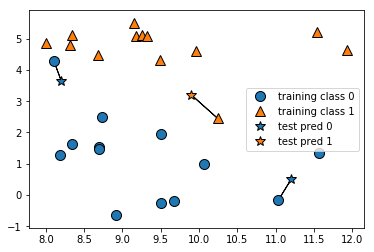

In [110]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added three new data points, shown as stars.  
For each of them, we marked the closest point in the training set.  
The prediction of the one-nearest-neighbor algorithm is the label of that point (shown by the color of the cross).

Instead of only considering the only the closest neighbor, we can also consider an arbitrary number, `k`, of neighbors.  
When considering more than one neighbor, we use *voting* to assign a label.  
This means that for each test point, we count how many neighbors belog to class 0 and how many neighbors belong to class 1.  
We then assign the class that is more frequent -- the majority class among the *k*-nearest neighbors.  
The following example uses the three closest neighbors:

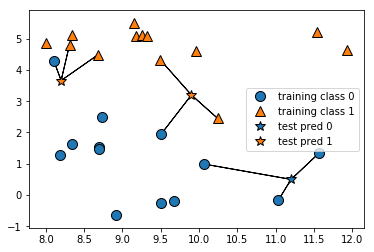

In [111]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

You can see that the prediction for the new data point at the top left is different from the prediction that was made using only one neighbor.  
While this illustration is for a binary classification problem, this method can be applied to datasets with any number of classes.  
For more classes, we count how many neighbors belong to each class and again predict the most common class.  

Now let's look at how we can apply the *k*-nearest neighbors algorithm using `scikit-learn`.  
First, we split our data into a training and a test set so we can evaluate generalization performance, as discussed in Chapter 1:

In [112]:
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Next, we import and instantiate the class.  
This is where we can set parameters, like the number of neighbors to use.  
Here, we're going to set the number of neighbors to 3:

In [113]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set.  
For [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) this means storing the dataset, so we can compute neighbors during prediction:

In [114]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

To make predictions on the test data, we call the `predict` method.  
For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

In [115]:
print("Test set predictions: \n{}".format(clf.predict(X_test)))

Test set predictions: 
[1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the `score` method with the test data together with the test labels:

In [116]:
print("Test set accuracy: \n{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 
0.86


Here we see that our model is about 86% accurate, meaning that the model predicted the class correctly for 86% of the samples in the test dataset. 

#### Analyzing KNeighborsClassifier

For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane.  
We color the plane according to the class that would be assigned to a point that lies in this region.  
This lets us view the [decision boundary](https://en.wikipedia.org/wiki/Decision_boundary), which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.  
The following code produces the visualizations of the decision boundaries for one, three, and nine neighbors:

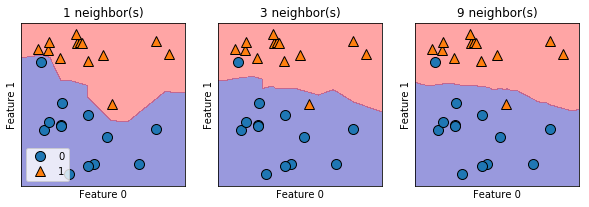

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # The fit method returns the object self, so we can instantiate and fit in one line.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

As we can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely.  
Considering more and more neighbors leads to a smoother decision boundary.  
A smoother boundary corresponds to a simpler model.  
In other words, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity.

Let's investigate whether we can confirm the connection between model complexity and generalization that was discussed earlier.  
We will do this on the real-world Breast Cancer dataset.  
We begin by splitting the data into a training set and a test set.  
Then we evaluate training and test set performance with different numbers of neighbors.  

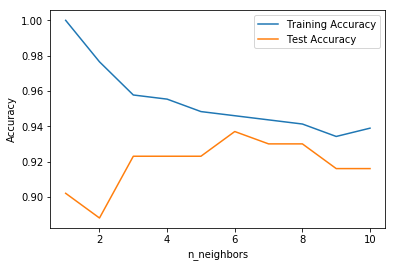

In [118]:
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# Try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Build model 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train))
    # Record generaliztion accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting.  
Considering a single nearest neighbor, the prediction on the training set is perfect.  
When more neighbors are considered, the model becomes simpler and the training accuracy drops.  
The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex.  
On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse.  
The best performance is somewhere in the middle, using around 6 neighbors.

#### k-neighbors regression

There is also a regression variant of the KNN algorithm.  
Again, let's start by using the single nearest neighbor, this time using the `wave` dataset.  
We've added three test data points as green stars on the x-axis.  
The prediction using a single neighbor is just the target value of the nearest neighbor.  
These predictions are shown as blue stars in the following plot:

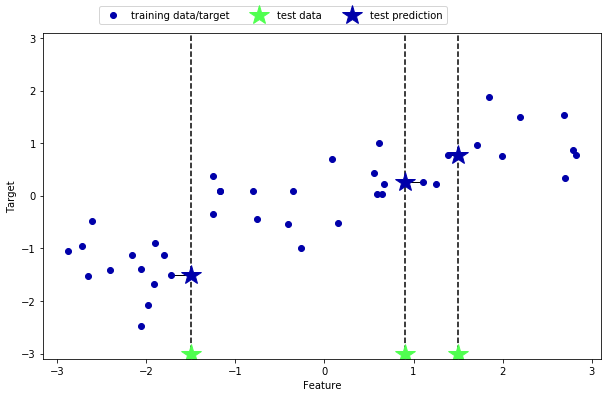

In [119]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

We can use more than the single closest neighbor for regression.  
When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors:

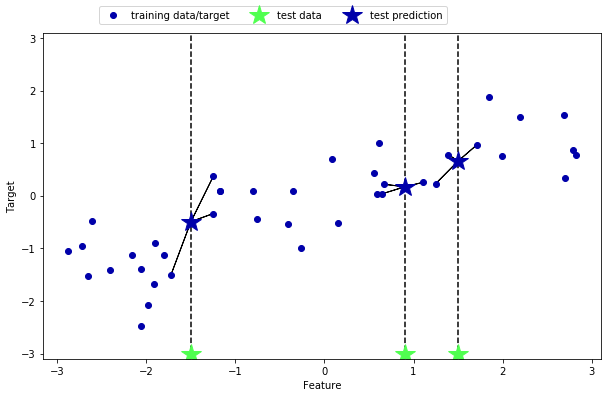

In [120]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The KNN algorithm for regression is implemented in the [KNeighborsRegressor class](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) in `scikit-learn`.  
It's used similarly to KNeighborsClassifier:

In [121]:
from sklearn.neighbors import KNeighborsRegressor 

X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the wave dataset into a training and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model and set the number of neighbors to consider to 3.
reg = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data and training targets.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

Now we can make predictions of the test set:

In [122]:
print("Test set predictions: \n{}".format((reg.predict(X_test).round(3))))

Test set predictions: 
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


We can also evaluate the model using the [score method](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score), which for regressors returns the $R^{2}$ score.  
The $R^{2}$ score, also known as the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), is a measure of how well a prediction fits a regression model, and yields a score between 0 and 1.  
A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, `y_train`.

In [123]:
print("Test set R^2: \n{:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 
0.83


Here, the score is 0.83, which indicates a relatively good model fit.

#### Analyzing KNeighborsRegressor

For our one-dimensional dataset, we can see what the predictions look like for all possible feature values.  
To do this, we create a test dataset consistiong of many points on the x-axis, which corresponds to the single feature:

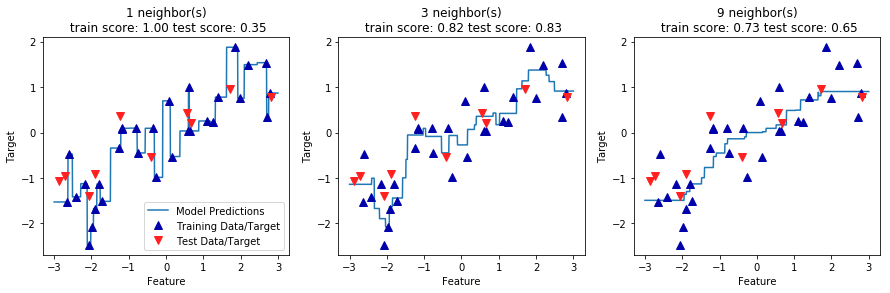

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Create 1000 data points, evenly spaced between -3 and 3.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Make predictions using 1, 3, or 9 neighbors.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predictions", "Training Data/Target", "Test Data/Target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points.  
This leads to a very unsteady prediction.  
Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

#### Strengths, weaknesses, and parameters

In principle, there are two important parameters to the `KNeighbors` classifier: the number of neighbors and how you measure distance between data points.  
The KNN model is very easy to understand and implement, but prediction is slow when the training set is large, and datasets with many features (especially sparse datasets) can cause KNN to perform poorly.

### Linear Models

[Linear models](https://en.wikipedia.org/wiki/General_linear_model) make a prediction using a [linear function](http://www.columbia.edu/itc/sipa/math/linear.html) of the input features, which will be explained shortly.  

#### Linear models for regression

For regression, the general prediction formula for a linear model looks as follows:  

$ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$

Here, $x[0]$ to $x[p]$ denotes the features (in this example, the number of features is `p+1`) of a single data point, $w$ and $b$ are the parameters of the model that are learned, and $ŷ$ is the prediction the model makes.  
For a dataset with a single feature, this is:  

$ŷ = w[0] * x[0] + b$  

which is the equation for a line.  
Here, $w[0]$ is the slope and $b$ is the y-axis offset.  
For more features, $w$ contains the slopes along each feature axis.  
Alternatively, you can think of the predicted response as being a weighted sum of the input features, with weights (which can be positive or negative) given by the entries of $w$.  

Trying to learn the parameters $w[0]$ and $b$ on our one-dimensional `wave` dataset might lead to the following line:

w[0]: 0.393906  b: -0.031804


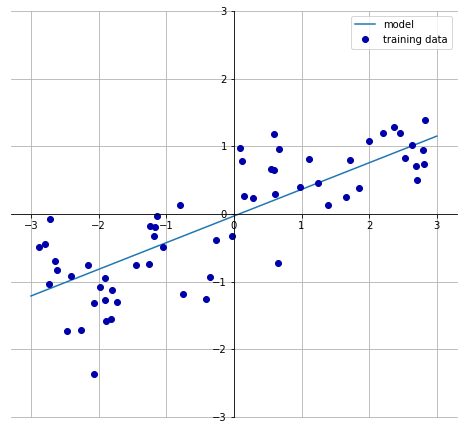

In [125]:
mglearn.plots.plot_linear_regression_wave()

A coordinate cross has been added to the plot to make it easier to understand the line.  
Looking at $w[0]$ we see that the slope should be around 0.4, which can be confirmed visually in the plot.  
The intercept is where the prediction line should cross the y-axis: this is slightly below zero, which can also be confirmed visually in the plot.

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (when using more features).  
If you compare the predictions made by the straight line with those made by the `KNeighborsRegressor` model, using a straight line to make predictions seems very restrictive.  
It looks like all the fine details of the data are lost.  
In a sense, this is true.  
It is a strong (and somewhat unrealistic) assumption that our target $y$ is a linear combination of the features.  
But looking at one-dimensional data gives a somewhat skewed perspective.  
For datasets with many features, linear models can be very powerful.  
In particular, if you have more featuures than training data points, any target $y$ can be perfectly modeled (on the training set) as a linear function.  

There are many different linear models for regression.  
The difference between these models lies in how the model parameters $w$ and $b$ are learned frorm the training data, and how model complexity can be controlled.  
We will now take a look at the most popular linear models for regression.  

#### Linear regression (aka ordinary least squares)

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression), or [ordinary least squares (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares), is the simplest and most classic linear method for regression.  
Linear regression finds the parameters $w$ and $b$ that minimize the [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) between predictions ans the true regression targets, $y$, on the training set.  
The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number of samples.  
Linear regression has no parameters, which is a benefit, but it also has no ways to control model complexity.

Here is the code that produces the model shown in the previous section (Linear models for regression):

In [126]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The "slope" parameters ($w$), also called weights or coefficients, are stored in the `coef_` attribute, while the offset or intercept ($b$) is stored in the `intercept_` attribute:

In [127]:
# The trailing underscore indicates anything derived from the training data.
# This separates them from parameters set by the user.
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


The `intercept_` attribute is always a single float number, while the `coef_` attribute is a NumPy array with one entry per input feature.  
Since we only have a single input feature in the `wave` dataset, `lr.coef_` only has a single entry.

Now let's have a look at the training set and test set performance:

In [128]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An $R^2$ of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together, which means that we are likely underfitting.  
For a one-dimensional dataset there is little risk of overfitting, but this risk increases with higher-dimensional (having more features) datasets.  
Let's take a look at how `LinearRegression` performs on a more complex dataset, like the Boston Housing dataset, which has 506 samples and 105 derived features.  
First, we'll load the dataset and split it into a training and a test set, then we'll build the linear regression model like we did before:


In [129]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

When comparing training set and test set scores, we find that we predict very accurately in the training set, but the $R^2$ on the test set is much worse:

In [130]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity.  
One of the most commonly used alternatives to standard linear regression is [ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization), which we will look into next.

#### Ridge regression

[Ridge regression](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf) is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares.  
In ridge regression, though, the coefficients ($w$) are chosen not only so that they predict well on the training data, but also fir an additional constraint.  
We also want the magnitude of coefficients to be as small as possible; in other words, all entries of $w$ should be close to 0.  
Intuitively, this means that each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well.  
This constraint is an example of what is called [regularization](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29).  
Regularization means explicitly restricting a model to avoid overfitting.  
The particular kind used by ridge regression is known as [L2 regularization](http://www.statisticshowto.com/regularization/).  

[Ridge regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) is implemented in `linear_model.Ridge`.  
Let's see how well it does on the extended Boston Housing dataset:

In [131]:
from sklearn.linear_model import Ridge 

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As you can see, the training set score of `Ridge` is *lower* than for `LinearRegression`, while the test score is *higher*.  
With linear regression, we were overfitting our data.  
`Ridge` is a more restricted model, so we are less likely to overfit.  
A less complex model means worse performance on the training set, but better generalization.

The `Ridge` model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set.  
How much importance the model places on simplicity versus training set performance can be specified by the user, using the `alpha` parameter.  
In the previous example, we used the default parameter of `alpha=1.0`, but there is no reason why the default will give us the best trade-off, though.  
The optimum setting of `alpha` depends on the particular dataset we are using.  
Increasing `alpha` forces coefficients to move towards zero, which decreases training set performance but might help generalization.  

In [132]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasing `alpha` allows the coefficients to be less restricted.  
For very small values of `alpha`, coefficients are barely restricted at all, and we end up with a model that resembles `LinearRegression`:

In [133]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Here, `alpha=0.1` seems to be working well.  
We could try decreasing `alpha` even more to improve generalization.  
We will discuss methods to properly select parameters in Chapter 5.

We can also get a more qualitative insight into how the `alpha` parameter changes the model by inspecting the `coef_` attribute of models with different values of `alpha`.  
A higher `alpha` means a more restricted model, so we expect the entries of `coef_` to have smaller magnitude for a high value of `alpha` than for a low value of `alpha`.

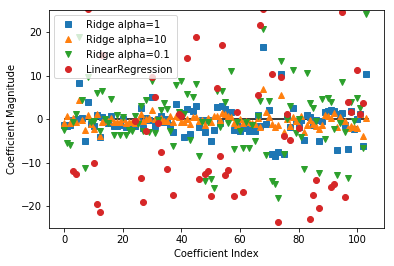

In [134]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Here, the x-axis enumerates the entries of `coef_`:  
`x=0` shows the coefficient associated with the first feature, x=1 the coefficient associated with the second feature, and so on up to x=100.  
The y-axis shows the numeric values of the corresponding values of the coefficients.  
The main takeaway here is that for `alpha=10`, the coefficients are mostly between -3 and 3.  
The coefficients for the `Ridge` model with `alpha=1` are somewhat larger.  
The dots corresponding to `alpha=0.1` have larger magnitude still, and many of the dots corresponding to linear regression without any regularization (which would be `alpha=0`) are so large that they are outside of the plot.

Another way to understand the influence of regularization is to fix a value of `alpha` but vary the amount of training data available.  
In the following plot we subsampled the Boston Housing dataset and evaluated `LinearRegression` and `Ridge(alpha=1)` on subsets of increasing size (plots that show model performance as a function of dataset size are called [learning curves](http://mlwiki.org/index.php/Learning_Curves):

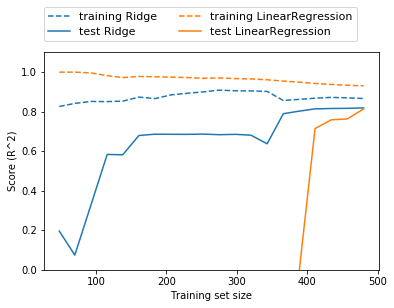

In [135]:
mglearn.plots.plot_ridge_n_samples()

The training score is higher than the test score for all dataset sizes for both ridge and linear regression.  
Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board.  
However, the test score for ridge is better, particularly for small subsets of the data.  
For less than 400 data points, linear regression isn't able to learn anything.  
As more and more data becomes avaliable to the model, both models improve, and linear regression catches up with ridge in the end.  
The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here when using the full dataset is just by chance).  
Another interesting aspect of the plot above is the decrease in training performance for linear regression.  
If more data is added, it becomes harder for a model to overfit, or memorize the data.

#### Lasso

An alternative to `Ridge` for regularizing linear regression is [Lasso](https://en.wikipedia.org/wiki/Lasso_%28statistics%29).  
As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way using [L1 regularization](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/).  
The consequence of using L1 regularization is that when using the lasso, some coefficients are *exactly zero*.  
This means that some features are completely ignored by the model.  
This can be seen as a form of automatic feature selection.  
Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features in your model.

Let's apply the lasso to the extended Boston Housing dataset:

In [136]:
from sklearn.linear_model import Lasso 

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


As you can see, `Lasso` performs poorly, both on the training and test sets.  
This indicated underfitting, and we can see that it used only 4 of the 105 features.  
Similarly to `Ridge`, the `Lasso` also has a regularization parameter, `alpha`, that controls how strongly the coefficients are pushed towards zero.  
In the previous example, we used the default of `alpha=1.0`.  
To reduce underfitting, let's try decreasing `alpha`.  
When we do this, we also need to increase the default setting of `max_iter` (the maximum number of iterations to run), or else the model will warn us that we should increase `max_iter`.

In [137]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower `alpha` allowed us to fit a more complex model, which worked better on the training and the test data.  
The performance is slightly better that using `Ridge`, and we are only using 33 of the 105 features.  
This make s the model potentially easier to understand.  

If we set `alpha` too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to `LinearRegression`:

In [138]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


Again, we can plot the coefficients of the different models.

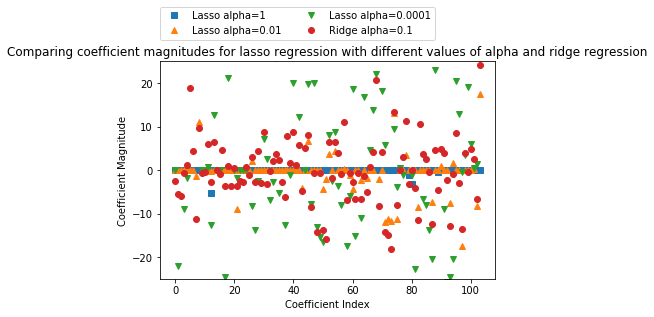

In [139]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.1))
plt.ylim(-25, 25)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Comparing coefficient magnitudes for lasso regression with different values of alpha and ridge regression")

For `alpha=1`, we not only see that most of the coefficients are zero, but that the remaining coefficients are small in magnitude.  
Decreasing `alpha` to `0.01`, we get the solution shown as an upward pointing triangle, which causes most features to be exactly zero.  
Using `alpha=0.0001`, we get a model that that is quite unregularized, with most coefficients nonzero and of large magnitude.  
For comparison, the best `Ridge` solution is shown as circles.  
The `Ridge` model with `alpha=0.1` has similar predictive performance as the `Lasso` model with `alpha=0.01`, but using `Ridge`, all coefficients are nonzero.

In practice, ridge regression is usually the first choice between these two models.  
However, if you have a large number of features and only expect a few of them to be important, lasso regression might be a better choice.  
Similarly, if you would like to have a model that is easy to interpret, `Lasso` will provide a model that is easier to understand, as it will select only a small subset of the input features.  
`scikit-learn` also provides the [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) class, which combines the penalties of `Lasso` and `Ridge`.  
In practice, this combination works best, though at the price of having two parameters to adjust: one each for L1 and L2 regularization.

#### Linear models for classification

Linear models are also extensively used for classification.  
Let's look at binary classification first.  
In this case, a prediction is made using the following formula:  

$ŷ = w[0] * x[0] + w[1] * x[1] + \ldots + w[p] * x[p] + b > 0$  

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero.  
If the function is smaller than zero, we predict the class -1; if it is larger than zero, we predict the class +1.  
This predicition rule is common to all linear models for classification.  
Again, there are many different ways to find the coefficients $(w)$ and the intercept $(b)$.

For linear models for regression, the output, $\hat y$, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions).  
For linear models for classification, the decision boundary is a linear function of the input.  
In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.  
We will see examples of that in this section.
There are many algorithms for learning linear models.  
These algorithms all differ in the following two ways:
- The way in which they measure how well a particular combination of coefficients and intercept fits the training data.
- If and what kind of regularization they use.  

Different algorithms choose different ways to measure what “fitting the training set well” means.  
For technical mathematical reasons, it is not possible to adjust $w$ and $b$ to minimize the number of misclassifications the algorithms produce, as one might hope.  
For our purposes, and many applications, the different choices for item 1 in the preceding list (called [loss functions](https://en.wikipedia.org/wiki/Loss_function)) are of little significance.  

The two most common linear classification algorithms are [logistic regression](https://en.wikipedia.org/wiki/Loss_function), implemented in `linear_model.LogisticRegression`, and [linear support vector machines (linear SVMs)](https://en.wikipedia.org/wiki/Support_vector_machine#Linear_SVM), which are implemented in `svm.LinearSVC` (SVC -- support vector classifier).  
Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.

We can apply the `LogisticRegression` and `LinearSVC` models to the `forge` dataset, and visualize the decision boundary as found by the linear models:

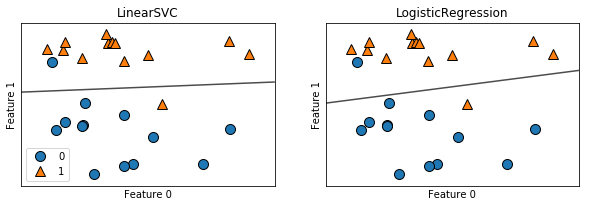

In [140]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In this figure, we have the first feature of the `forge` dataset on the x-axis and the second feature on the y-axis, as before.  
We display the decision boundaries found by `LinearSVC` and `LogisticRegression` respectively as straight lines, separating the area classified as class 1 on the top from the area classified as class 0 on the bottom.  
In other words, any new data point that lies above the black line will be classified as class 1 by the respective classifier, while any point that lies below the black line will be classified as class 0.
The two models come up with similar decision boundaries.  
Note that both misclassify two of the points.  
By default, both models apply an L2 regularization, in the same way that `Ridge` does for regression.  
For `LogisticRegression` and `LinearSVC` the trade-off parameter that determines the strength of the regularization is called $C$, and higher values of $C$ correspond to less regularization.  
In other words, when you use a high value for the parameter $C$, `LogisticRegression` and `LinearSVC` try to fit the training set as best as possible, while with low values of the parameter $C$, the models put more emphasis on finding a coefficient vector $(w)$ that is close to zero.  

There is another interesting aspect of how the parameter $C$ acts.  
Using low values of $C$ will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of $C$ stresses the importance that each individual data point be classified correctly.  
Here is an illustration using `LinearSVC`:

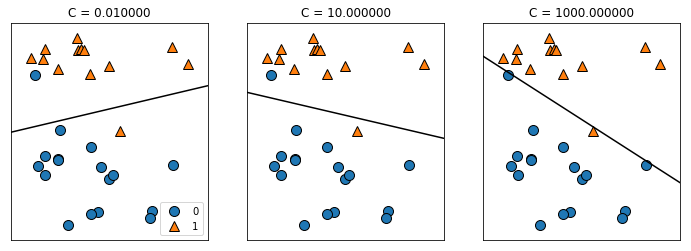

In [141]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small $C$ corresponding to a lot of regularization.  
Most of the points in class 0 are at the bottom, and most of the points in class 1 are at the top.  
The strongly regularized model chooses a relatively horizontal line, misclassifying two points.  
In the center plot, $C$ is slightly higher, and the model focuses more on the two misclassified samples, tilting the decision boundary.  
Finally, on the righthand side, the very high value of $C$ in the model tilts the decision boundary a lot, now correctly classifying all points in class 0.  
One of the points in class 1 is still misclassified, as it is not possible to correctly classify all points in this dataset using a straight line.  
The model illustrated on the righthand side tries hard to correctly classify all points, but might not capture the overall layout of the classes well.  
In other words, this model is likely overfitting.

Similarly to the case of regression, linear models for classification might seem very restrictive in low-dimensional spaces, only allowing for decision boundaries that are straight lines or planes.  
Again, in high dimensions, linear models for classification become very powerful, and guarding against overfitting becomes increasingly important when considering more features.

Let's analyze `LogisticRegression` in more detail on the Breast Cancer dataset:

In [142]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("cancer.data: \n{}".format(cancer.data))
print("cancer.target: \n{}".format(cancer.target))
print()
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

cancer.data: 
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]
cancer.target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 

The default value of $C=1$ provides good performance, with nearly 96% accuracy on both the training and the test set.  
But as training and test set performance are very close, it is likely that we are underfitting.  
Let's try increasing $C$ to fit a more flexible model:

In [143]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


Using $C=100$ results in higher training set accuracy, and also a slightly increased test set accuracy, confirming our intuition that a more complex model should perform better.  
We can also investigate what happens if we use an even more regularized model than the default of $C=1$, by setting $C=0.01$:

In [144]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


As expected, when moving more to the left along the scale shown in figure 2-1 from an already underfit model, both training and test set accuracy decrease relative to the default parameters.  
Finally, let's look at the coefficients learned by the models with the three different settings of the regularization parameter $C$:

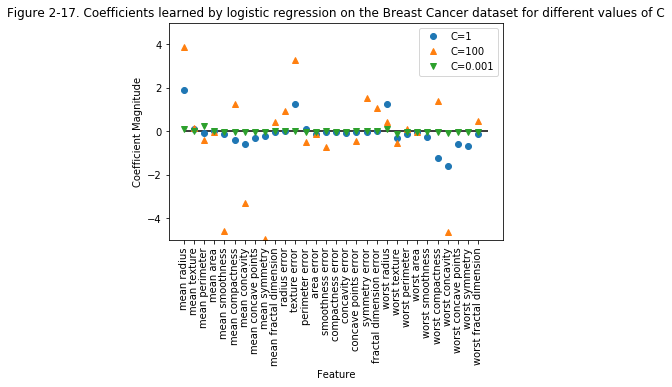

In [145]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Figure 2-17. Coefficients learned by logistic regression on the Breast Cancer dataset for different values of C")
plt.legend()

**Warning:**  
As `LogisticRegression` applies an L2 regularization by default, the result looks similar to that produced by `Ridge` in Figure 2-12.  
Stronger regularization pushes coefficients more and more toward zero, though coefficients never become exactly zero.  
Inspecting the plot more closely, we can also see an interesting effect in the third coefficient, for “mean perimeter.”  
For $C=100$ and $C=1$, the coefficient is negative, while for $C=0.001$, the coefficient is positive, with a magnitude that is even larger than for $C=1$.  
Interpreting a model like this, one might think the coefficient tells us which class a feature is associated with.  
For example, one might think that a high “texture error” feature is related to a sample being “malignant.”  
However, the change of sign in the coefficient for “mean perimeter” means that depending on which model we look at, a high “mean perimeter” could be taken as being either indicative of “benign” or indicative of “malignant.”  
This illustrates that interpretations of coefficients of linear models should always be taken with a grain of salt.

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features.  
Here is the coefficient plot and classification accuracies for L1 regularization:

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


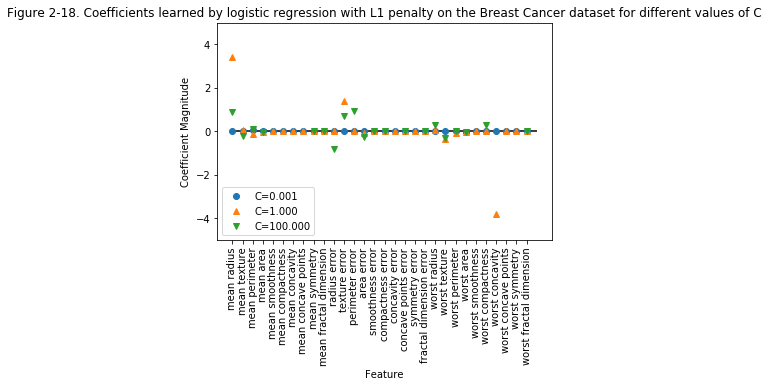

In [146]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
         C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
         C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Figure 2-18. Coefficients learned by logistic regression with L1 penalty on the Breast Cancer dataset for different values of C")
plt.ylim(-5, 5)
plt.legend(loc=3)

As you can see, there are many parallels between linear models for binary classification and linear models for regression.  
As in regression, the main difference between the models is the `penaly` parameter, which influences the regularization and whether the model will use all of the available features or only a subset.

#### Linear models for multiclass classification

Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression).  
A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach.  
In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes.  
To make a prediction, all binary classifiers are run on a test point.  
The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.  
Having one binary classifier per class results in having one vector of coefficients $(w)$ and one intercept $(b)$ for each class.  
The class for which the result of the classification confidence formula given here is highest is the assigned class label:  

$w[0] * x[0] + w[1] * x[1] + \ldots + w[p] * x[p] + b$  

The mathematics behind multiclass logistic regression differ somewhat from the one-vs.-rest approach, but they also result in one coefficient vector and intercept per class, and the same method of making a prediction is applied.  
Let’s apply the one-vs.-rest method to a simple three-class classification dataset.  
We use a two-dimensional dataset, where each class is given by data sampled from a Gaussian distribution (see Figure 2-19):

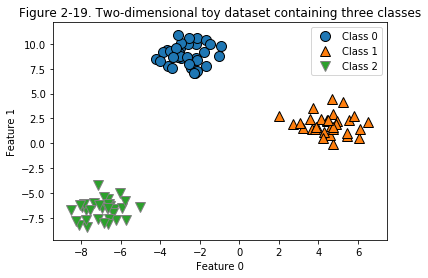

In [147]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Figure 2-19. Two-dimensional toy dataset containing three classes")
plt.legend(["Class 0", "Class 1", "Class 2"])

Now, we train a `LinearSVC` classifier on the dataset:

In [148]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


We can see that the shape of the `coef_` is `(3, 2)`, meaning that each row of `coef_` contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset).  
The `intercept_` is now a one-dimensional array, storing the intercepts for each class.  
Let's visualize the lines given by the three binary classifiers:

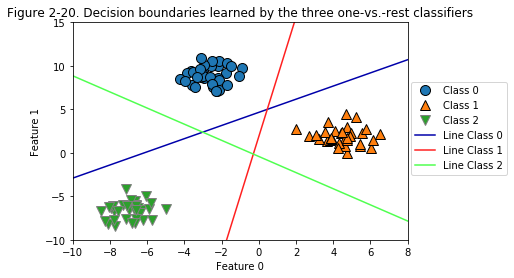

In [149]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Figure 2-20. Decision boundaries learned by the three one-vs.-rest classifiers")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))

You can see that all the points belonging to class 0 in the training data are above the line corresponding to class 0, which means they are on the “class 0” side of this binary classifier.  
The points in class 0 are above the line corresponding to class 2, which means they are classified as “rest” by the binary classifier for class 2.  
The points belonging to class 0 are to the left of the line corresponding to class 1, which means the binary classifier for class 1 also classifies them as "rest".  
Therefore, any point in this area will be classified as class 0 by the final classifier (the result of the classification confidence formula for classifier 0 is greater than zero, while it is smaller than zero for the other two classes).

But what about the triangle in the middle of the plot?  
All three binary classifiers classify points there as "rest".  
Which class would a point there be assigned to?  
The answer is the one with the highest value for the classification formula -- the class of the closest line.

The following example shows the predictions for all regions of the 2D space:

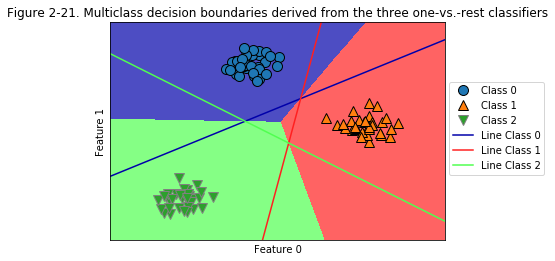

In [150]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Figure 2-21. Multiclass decision boundaries derived from the three one-vs.-rest classifiers")

#### Strengths, weaknesses, and parameters

The main parameter of linear models is the regularization parameter, called `alpha` in the regression models and $C$ in `LinearSVC` and `LogisticRegression`.  
Large values for `alpha` or small values for $C$ mean simple models.  
In particular for the regression models, tuning these parameters is quite important.  
Usually $C$ and `alpha` are searched for on a logarithmic scale.  
The other decision you have to make is whether you want to use L1 regularization or L2 regularization.  
If you assume that only a few of your features are actually important, you should use L1.  
Otherwise, you should default to L2.  
L1 can also be useful if interpretability of the model is important.  
As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

Linear models are very fast to train, and also fast to predict.  
They scale to very large datasets and work well with sparse data.  
If your data consists of hundreds of thousands or millions of samples, you might want to investigate using the `solver='sag'` option in `LogisticRegression` and `Ridge`, which can be faster than the default on large datasets.  
Other options are the [SGDClassifier class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) and the [SGDRegressor class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html), which implement even more scalable versions of the linear models described here.  
Another strength of linear models is that they make it relatively easy to understand how a prediction is made, using the formulas we saw earlier for regression and classification.  
Unfortunately, it is often not entirely clear why coefficients are the way they are.  
This is particularly true if your dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.  
Linear models often perform well when the number of features is large compared to the number of samples.  
They are also often used on very large datasets, simply because it’s not feasible to train other models.  
However, in lower-dimensional spaces, other models might yield better generalization performance.  
We will look at some examples in which linear models fail in “Kernelized Support Vector Machines”.

#### Method Chaining

The `fit` method od all `scikit-learn` models returns `self`.  
This allows you to write code like the following, which we've already used extensively in this chapter:

In [151]:
# Instantiate model and fit it in one line of code.
logreg = LogisticRegression().fit(X_train, y_train)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Here, we used the return value of `fit` (which is `self`) to assign the trained model to the variable `logreg`.  
This concatenation of method calls (here `__init__` and then `fit`) is known as [method chaining](https://en.wikipedia.org/wiki/Method_chaining).  
Another common application of method chaining in `scikit-learn` is to `fit` and `predict` in one line:

In [152]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1])

Finally, you can even do model instantiation, fitting, and predicting all in one line:

In [153]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1])

This very short variant is not ideal, though.  
A lot is happening in a single line, which might make the code hard to read.  
Additionally, the fitted logistic regression model isn't stored in any variable, so we can't inspect it or use it to predict any other data.

### Naive Bayes Classifiers

[Naive Bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) are a family of classifiers that are quite similar to the linear models discussed in the previous section.  
However, they tend to be even faster in training.  
The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like `LogisticRegression` and `LinearSVC`.  
The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature.  
There are three kinds of naive Bayes classifiers implemented in scikit-learn: [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html), and [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB).  
`GaussianNB` can be applied to any continuous data, while `BernoulliNB` assumes binary data and `MultinomialNB` assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence).  
`BernoulliNB` and `MultinomialNB` are mostly used in text data classification.

The `BernoulliNB` classifier counts how often every feature of each class is not zero.  
This is most easily understood with an example:

In [154]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

Here, we have four data points, with four binary features each.  
There are two classes, 0 and 1.  
For class 0 (the first and third data points), the first feature is zero two times and nonzero zero times, the second feature is zero one time and nonzero one time, and so on.  
These same counts are then calculated for the data points in the second class.  
Counting the nonzero entries per class in essence looks like this:

In [155]:
counts = {}
for label in np.unique(y):
    # Iterate over each class and count (sum) entries of 1 per feature.
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts: \n{}".format(counts))

Feature counts: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


The other two naive Bayes models, `MultinomialNB` and `GaussianNB`, are slightly different in what kinds of statistics they compute.  
`MultinomialNB` takes into account the average value of each feature for each class, while `GaussianNB` stores the average value as well as the standard deviation of each feature for each class.  
To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching class is predicted.  
Interestingly, for both `MultinomialNB` and `BernoulliNB`, this leads to a prediction formula that is of the same form as in the linear models (see "Linear models for classification").  
Unfortunately, `coef_` for the naive Bayes models has a somewhat different meaning than in the linear models, in that `coef_` is not the same as $w$.

#### Strengths, weaknesses, and parameters

`MultinomialNB` and `BernoulliNB` have a single parameter, `alpha`, which controls model complexity.  
The way `alpha` works is that the algorithm adds to the data `alpha` many virtual data points that have positive values for all the features.  
This results in a “smoothing” of the statistics.  
A large `alpha` means more smoothing, resulting in less complex models.  
The algorithm’s performance is relatively robust to the setting of `alpha`, meaning that setting `alpha` is not critical for good performance.  
However, tuning it usually improves accuracy somewhat.  
`GaussianNB` is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text.  
`MultinomialNB` usually performs better than `BernoulliNB`, particularly on datasets with a relatively large number of nonzero features (i.e., large documents).  
The naive Bayes models share many of the strengths and weaknesses of the linear models.  
They are very fast to train and to predict, and the training procedure is easy to understand.  
The models work very well with high-dimensional sparse data and are relatively robust to the parameters.  
Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long.

### Decision Trees

Decision trees are widely used models for classification and regression tasks.  
Essentially, they learn a hierarchy of if/else questions, leading to a decision.  
These questions are similar to the questions you might ask in a game of 20 Questions.    
Imagine you want to distinguish between the following four animals: bears, hawks, penguins, and dolphins.  
Your goal is to get to the right answer by asking as few if/else questions as possible.  
You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two.  
If the answer is “yes,” you can ask another question that could help you distinguish between hawks and penguins.  
For example, you could ask whether the animal can fly.  
If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals—for example, asking whether the animal has fins.  
This series of questions can be expressed as a decision tree:

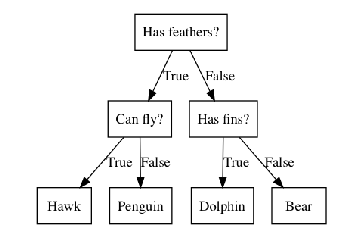

In [156]:
mglearn.plots.plot_animal_tree()

In this illustration, each node in the tree either represents a question or a terminal node (also called a *leaf*) that contains the answer.  
The edges connect the answers to a question with the next question you would ask.  
In machine learning parlance, we built a model to distinguish between four classes of animals (hawks, penguins, dolphins, and bears) using the three features "has feathers", "can fly", and "has fins".  
Instead of building these models by hand, we can learn them from data using supervised learning.

#### Building decision trees

Let’s go through the process of building a decision tree for the 2D classification dataset shown in Figure 2-23 below.  
The dataset consists of two half-moon shapes, with each class consisting of 75 data points.  
We will refer to this dataset as `two_moons`.  
Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.  
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is).  
Usually data does not come in the form of binary yes/no features as in the animal example, but is instead represented as continuous features such as in the 2D dataset shown in Figure 2-23.  
The tests that are used on continuous data are of the form “Is feature `i` larger than value `a`?”  

<img src="images/fig2_23.png",width=400, title="Figure 2-23. Two-moons dataset on which the decision tree will be built"/>
<p style="text-align:center;">Figure 2-23. Two-moons dataset on which the decision tree will be built</p>

To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.  
Figure 2-24 shows the first test that is picked.  
Splitting the dataset horizontally at `x[1]=0.0596` yields the most information; it best separates the points in class 0 from the points in class 1.  
The top node, also called the root, represents the whole dataset, consisting of 75 points belonging to class 0 and 75 points belonging to class 1.  
The split is done by testing whether `x[1] <= 0.0596`, indicated by a black line.  
If the test is true, a point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points belonging to class 1.  
Otherwise the point is assigned to the right node, which contains 48 points belonging to class 0 and 18 points belonging to class 1.  
These two nodes correspond to the top and bottom regions shown in Figure 2-24.  
Even though the first split did a good job of separating the two classes, the bottom region still contains points belonging to class 0, and the top region still contains points belonging to class 1.  
We can build a more accurate model by repeating the process of looking for the best test in both regions.  
Figure 2-25 shows that the most informative next split for the left and the right region is based on `x[0]`.

<img src="images/fig2_24.png",width=800, title="Figure 2-24. Decision boundary of tree with depth 1 (left) and corresponding tree (right)"/>
<p style="text-align:center;">Figure 2-24. Decision boundary of tree with depth 1 (left) and corresponding tree (right)</p>

<img src="images/fig2_25.png",width=800, title="Figure 2-25. Decision boundary of tree with depth 2 (left) and corresponding decision tree (right)"/>
<p style="text-align:center;">Figure 2-25. Decision boundary of tree with depth 2 (left) and corresponding decision tree (right)</p>

This recursive process yields a binary tree of decisions, with each node containing a test.  
Alternatively, you can think of each test as splitting the part of the data that is currently being considered along one axis.  
This yields a view of the algorithm as building a hierarchical partition.  
As each test concerns only a single feature, the regions in the resulting partition always have axis-parallel boundaries.
The recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision tree) only contains a single target value (a single class or a single regression value).  
A leaf of the tree that contains data points that all share the same target value is called pure.  
The final partitioning for this dataset is shown in Figure 2-26.

<img src="images/fig2_26.png",width=800, title="Figure 2-26. Decision boundary of tree with depth 9 (left) and part of the corresponding tree (right); the full tree is quite large and hard to visualize"/>
<p style="text-align:center;">Figure 2-26. Decision boundary of tree with depth 9 (left) and part of the corresponding tree (right); the full tree is quite large and hard to visualize</p>

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target (or the single target in the case of pure leaves) in that region.  
The region can be found by traversing the tree from the root and going left or right, depending on whether the test is fulfilled or not.  
It is also possible to use trees for regression tasks, using exactly the same technique.  
To make a prediction, we traverse the tree based on the tests in each node and find the leaf the new data point falls into.  
The output for this data point is the mean target of the training points in this leaf.

#### Controlling complexity of decision trees

Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data.  
The presence of pure leaves mean that a tree is 100% accurate on the training set; each data point in the training set is in a leaf that has the correct majority class.  
The overfitting can be seen on the left of Figure 2-26.  
You can see the regions determined to belong to class 1 in the middle of all the points belonging to class 0.  
On the other hand, there is a small strip predicted as class 0 around the point belonging to class 1 to the very right.  
This is not how one would imagine the decision boundary to look, and the decision boundary focuses a lot on single outlier points that are far away from the other points in that class.  
There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning).  
Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.

Decision trees in scikit-learn are implemented in the [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) classes.  
`scikit-learn` only implements pre-pruning, not post-pruning.  
Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset.  
As always, we import the dataset and split it into a training and a test part.  
Then we build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure).  
We fix the random_state in the tree, which is used for tie-breaking internally:

In [157]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected, the accuracy on the training set is 100% -- because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data.  
The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.  
If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex.  
Unpruned trees are therefore prone to overfitting and not generalizing well to new data.  
Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data.  
One option is to stop building the tree after a certain depth has been reached.  
Here we set `max_depth=4`, meaning only four consecutive questions can be asked (cf. Figures 2-24 and 2-26).  
Limiting the depth of the tree decreases overfitting.  
This leads to a lower accuracy on the training set, but an improvement on the test set:

In [158]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing decision trees

We can visualize the tree using the `export_graphviz` function from the `tree` module.  
This writes a file in the `.dot` file format, which is a text file format for storing graphs.  
We set an option to color the nodes to reflect the majority class in each node and pass the class and feature names so that the tree can be properly labeled:

In [159]:
from sklearn.tree import export_graphviz 
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

We can read this file and visualize it using the `graphviz` module (or you can use any program that can read `.dot` files).

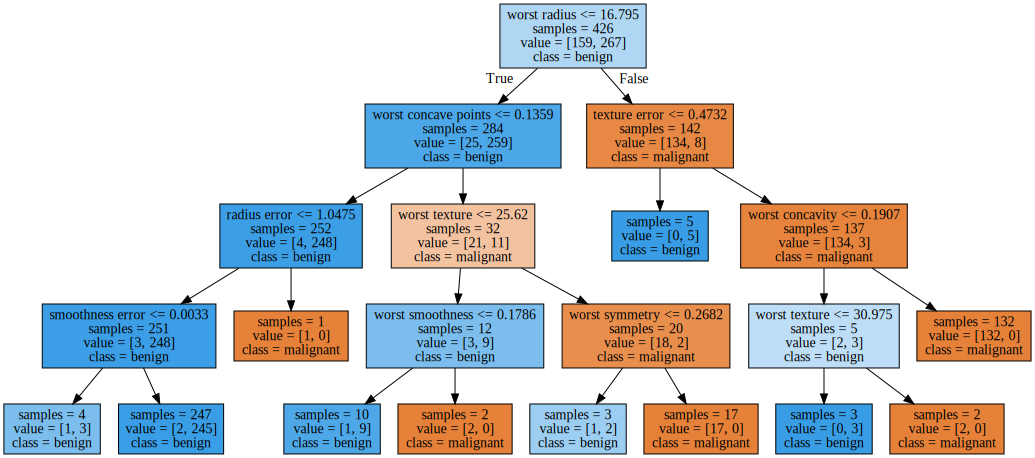

In [160]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    f.close()
display(graphviz.Source(dot_graph))

The visualization of the tree provides a great in-depth view of how the algorithm makes predictions, and is a good example of a machine learning algorithm that is easily explained to nonexperts.  
However, even with a tree of depth four, as seen here, the tree can become a bit overwhelming.  
Deeper trees (a depth of 10 is not uncommon) are even harder to grasp.  
One method of inspecting the tree that may be helpful is to find out which path most of the data actually takes.  
The samples shown in each node in Figure 2-27 above gives the number of samples in that node, while value provides the number of samples per class.  
Following the branches to the right, we see that `worst radius > 16.795` creates a node that contains only 8 benign but 134 malignant samples.  
The rest of this side of the tree then uses some finer distinctions to split off these 8 remaining benign samples.  
Of the 142 samples that went to the right in the initial split, nearly all of them (132) end up in the leaf to the very right.  
Taking a left at the root, for `worst radius <= 16.795` we end up with 25 malignant and 259 benign samples.  
Nearly all of the benign samples end up in the second leaf from the left, with most of the other leaves containing very few samples.

#### Feature importance in trees

Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree.  
The most commonly used summary is [feature importance](https://en.wikipedia.org/wiki/Feature_selection), which rates how important each feature is for the decision a tree makes.  
It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.”  
The feature importances always sum to 1:

In [161]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


We can visualize the feature importances in a way that is similar to the way that we visualize the coefficients in the linear model:

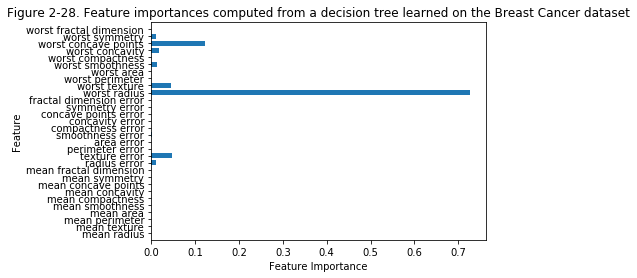

In [162]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.title("Figure 2-28. Feature importances computed from a decision tree learned on the Breast Cancer dataset")
plot_feature_importances_cancer(tree)

Here we see that the feature used in the top split (`worst radius`) is by far the most important feature.  
This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.
However, if a feature has a low value in `feature_importance_`, it doesn’t mean that this feature is uninformative.  
It only means that the feature was not picked by the tree, likely because another feature encodes the same information.
In contrast to the coefficients in linear models, feature importances are always positive, and don’t encode which class a feature is indicative of.  
The feature importances tell us that `worst radius` is important, but not whether a high radius is indicative of a sample being benign or malignant.  
In fact, there might not be such a simple relationship between features and class, as you can see in the following example:

Feature importances: [ 0.  1.]


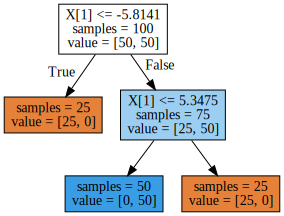

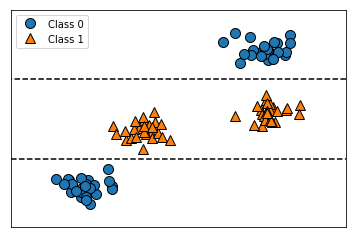

In [163]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

The plot shows a dataset with two features and two classes.  
Here, all the information is contained in `X[1]`, and `X[0]` is not used at all.  
But the relation between `X[1]` and the output class is not monotonous, meaning we cannot say “a high value of `X[1]` means class 0, and a low value means class 1” (or vice versa).  
While we focused our discussion here on decision trees for classification, all that was said is similarly true for decision trees for regression, as implemented in `DecisionTreeRegressor`.  
The usage and analysis of regression trees is very similar to that of classification trees.  
There is one particular property of using tree-based models for regression that we want to point out, though.  
The `DecisionTreeRegressor` (and all other tree-based regression models) is not able to extrapolate, or make predictions outside of the range of the training data.
Let’s look into this in more detail, using a dataset of historical computer memory (RAM) prices.  
The following example shows the dataset, with the date on the x-axis and the price of one megabyte of RAM in that year on the y-axis:

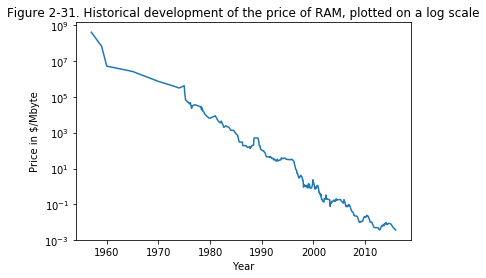

In [164]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.title("Figure 2-31. Historical development of the price of RAM, plotted on a log scale")

Note the logarithmic scale of the y-axis.  
When plotting logarithmically, the relation seems to be quite linear and so should be relatively easy to predict, apart from some bumps.  
We will make a forecast for the years after 2000 using the historical data up to that point, with the date as our only feature.  
We will compare two simple models: a `DecisionTreeRegressor` and `LinearRegression`.  
We rescale the prices using a logarithm, so that the relationship is relatively linear.  
This doesn’t make a difference for the `DecisionTreeRegressor`, but it makes a big difference for `LinearRegression` (we will discuss this in more depth in Chapter 4).  
After training the models and making predictions, we apply the exponential map to undo the logarithm transform.  
We make predictions on the whole dataset for visualization purposes here, but for a quantitative evaluation we would only consider the test dataset:

In [165]:
from sklearn.tree import DecisionTreeRegressor 

# Use historical data to forecast prices after the year 2000.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Predict prices based on date.
X_train = data_train.date[:, np.newaxis]

# Use a log-transform to get a simplified relationship of data to target.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# Predict on all of the data.
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# Undo the log-transform.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Now we can compare the predictions of the decision tree and the linear regression model with the ground truth:

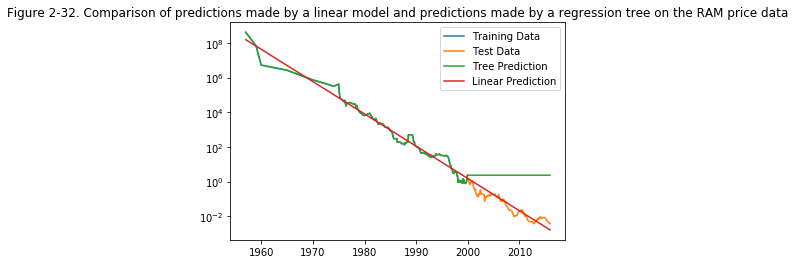

In [166]:
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Prediction")
plt.title("Figure 2-32. Comparison of predictions made by a linear model and predictions made by a regression tree on the RAM price data")
plt.legend()

The difference between the models is quite striking.  
The linear model approximates the data with a line, as we knew it would.  
This line provides quite a good forecast for the test data (the years after 2000), while glossing over some of the finer variations in both the training and the test data.  
The tree model, on the other hand, makes perfect predictions on the training data; we did not restrict the complexity of the tree, so it learned the whole dataset by heart.  
However, once we leave the data range for which the model has data, the model simply keeps predicting the last known point.  
The tree has no ability to generate “new” responses, outside of what was seen in the training data.  
This shortcoming applies to all models based on trees.

#### Strengths, weaknesses, and parameters

As discussed earlier, the parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed.  
Usually, picking one of the pre-pruning strategies—setting either `max_depth`, `max_leaf_nodes`, or `min_samples_leaf` -- is sufficient to prevent overfitting.
Decision trees have two advantages over many of the algorithms we’ve discussed so far: the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data.  
As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms.  
In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.  
The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance.  
Therefore, in most applications, the ensemble methods we discuss next are usually used in place of a single decision tree.

### Ensembles of Decision Trees

[Ensembles](https://en.wikipedia.org/wiki/Ensemble_learning) are methods that combine multiple machine learning models to create more powerful models.  
There are many models in the machine learning literature that belong to this category, but there are two ensemble models that have proven to be effective on a wide range of datasets for classification and regression, both of which use decision trees as their building blocks: [random forests](https://en.wikipedia.org/wiki/Random_forest) and [gradient boosted decision trees](https://en.wikipedia.org/wiki/Gradient_boosting).

#### Random forests

As we just observed, a main drawback of decision trees is that they tend to overfit the training data.  
Random forests are one way to address this problem.  
A random forest is essentially a collection of decision trees, where each tree is slightly different from the others.  
The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.  
If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results.  
This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics.
To implement this strategy, we need to build many decision trees.  
Each tree should do an acceptable job of predicting the target, and should also be different from the other trees.  
Random forests get their name from injecting randomness into the tree building to ensure each tree is different.  
There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test.  
Let’s go into this process in more detail.

##### Building random forests

To build a random forest model, you need to decide on the number of trees to build (the `n_estimators` parameter of `RandomForestRegressor` or `RandomForestClassifier`).  
Let’s say we want to build 10 trees.  
These trees will be built completely independently from each other, and the algorithm will make different random choices for each tree to make sure the trees are distinct.  
To build a tree, we first take what is called a [bootstrap sample](https://en.wikipedia.org/wiki/Bootstrapping_%28statistics%29) of our data.  
That is, from our `n_samples` data points, we repeatedly draw an example randomly with replacement (meaning the same sample can be picked multiple times), `n_samples` times.  
This will create a dataset that is as big as the original dataset, but some data points will be missing from it (approximately one third), and some will be repeated.  
To illustrate, let’s say we want to create a bootstrap sample of the list `['a', 'b', 'c', 'd']`.  
A possible bootstrap sample would be `['b', 'd', 'd', 'c']`.  
Another possible sample would be `['d', 'a', 'd', 'a']`.

Next, a decision tree is built based on this newly created dataset.  
However, the algorithm we described for the decision tree is slightly modified.  
Instead of looking for the best test for each node, in each node the algorithm randomly selects a subset of the features, and it looks for the best possible test involving one of these features.  
The number of features that are selected is controlled by the `max_features` parameter.  
This selection of a subset of features is repeated separately in each node, so that each node in a tree can make a decision using a different subset of the features.  
The bootstrap sampling leads to each decision tree in the random forest being built on a slightly different dataset.  
Because of the selection of features in each node, each split in each tree operates on a different subset of features.  
Together, these two mechanisms ensure that all the trees in the random forest are different.

A critical parameter in this process is `max_features`.  
If we set `max_features` to `n_features`, that means that each split can look at all features in the dataset, and no randomness will be injected in the feature selection (the randomness due to the bootstrapping remains, though).  
If we set `max_features` to 1, that means that the splits have no choice at all on which feature to test, and can only search over different thresholds for the feature that was selected randomly.  
Therefore, a high `max_features` means that the trees in the random forest will be quite similar, and they will be able to fit the data easily, using the most distinctive features.  
A low `max_features` means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well.  

To make a prediction using the random forest, the algorithm first makes a prediction for every tree in the forest.  
For regression, we can average these results to get our final prediction.  
For classification, a [soft voting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) strategy is used.  
This means each algorithm makes a “soft” prediction, providing a probability for each possible output label.  
The probabilities predicted by all the trees are averaged, and the class with the highest probability is predicted.

##### Analyzing random forests

Let's apply a random forest consisting of five trees to the [two-moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset we studied earlier:

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

The trees that are built as part of the random forest are stored in the `estimator_` attribute.  
Let's visualize the decision boundaries learned by each tree, together with their aggregate predicition as made by the forest:

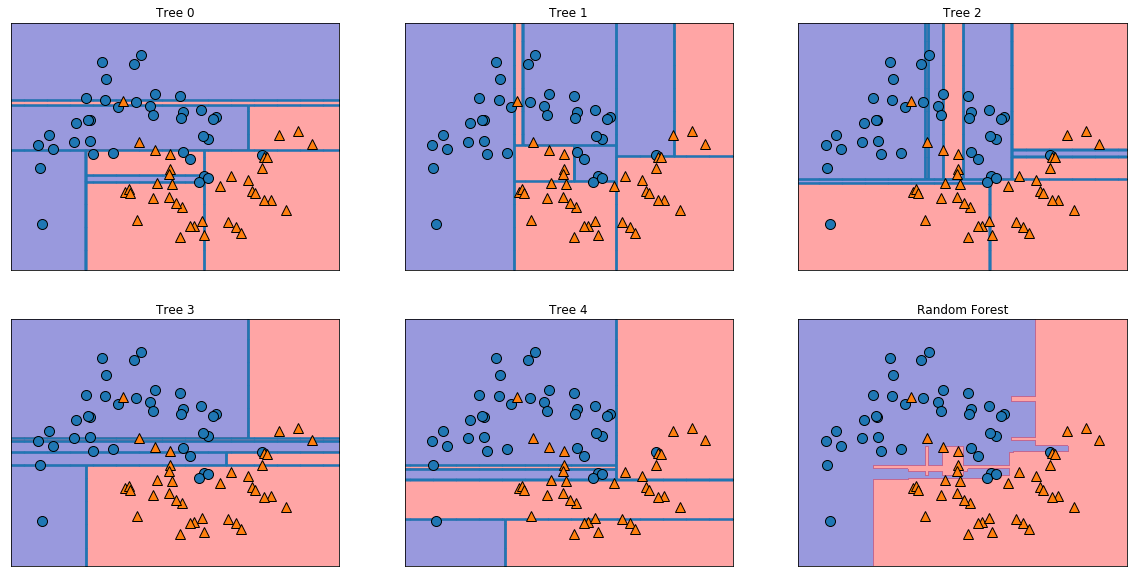

In [168]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Random Forest")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

You can clearly see that the decision boundaries learned by the five trees are quite different.  
Each of them makes some mistakes, as some of the training points that are plotted here were not actually included in the training sets of the trees, due to the bootstrap sampling.  
The random forest overfits less than any of the trees individually, and provides a much more intuitive decision boundary.  
In any real application, we would use many more trees (often hundreds or even thousands), leading to even smoother boundaries.

As another example, let's apply a random forest consisting of 100 trees on the Breast Cancer dataset:

In [169]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on the training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.972


The random forest gives us an accuracy of 97%, which is better than the linear models or a single decision tree, and without tuning any parameters.  
We could adjust the `max_features` setting, or apply pre-pruning as we did for the single decision tree.  
However, often the default parameters of the random forest already work quite well.

Similarly to the decision tree, the random forest provides feature importances, which are computed by aggregating the feature importances over all of the trees in the forest.  
Typically, the feature importances provided by the random forest are more reliable than the ones provided by a single tree.

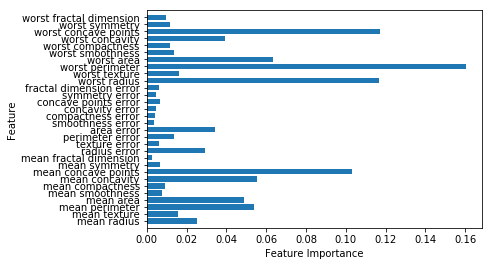

In [170]:
plot_feature_importances_cancer(forest)

As you can see, the random forest gives nonzero importance to many more features than the single tree.  
Similarly to the single decision tree, the random forest also gives a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter” to be the most informative feature overall.  
The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

##### Strengths, weaknesses, and parameters

Random forests for regression and classification are currently among the most widely used machine learning methods.  
They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.  
Essentially, random forests share all of the benefits of decision trees, while making up for some of their deficiencies.  
One reason to still use decision trees is if you need a compact representation of the decision-making process.  
It is basically impossible to interpret tens or hundreds of trees in detail, and trees in random forests tend to be deeper than decision trees (because of the use of feature subsets).  
Therefore, if you need to summarize the prediction making in a visual way to nonexperts, a single decision tree might be a better choice.  
While building random forests on large datasets might be somewhat time consuming, it can be parallelized across multiple CPU cores within a computer easily.  
If you are using a multi-core processor (as nearly all modern computers do), you can use the `n_jobs` parameter to adjust the number of cores to use.  
Using more CPU cores will result in linear speed-ups (using two cores, the training of the random forest will be twice as fast), but specifying `n_jobs` larger than the number of cores will not help.  
You can set `n_jobs=-1` to use all the cores in your computer.

You should keep in mind that random forests, by their nature, are random, and setting different random states (or not setting the `random_state` at all) can drastically change the model that is built.  
The more trees there are in the forest, the more robust it will be against the choice of random state.  
If you want to have reproducible results, it is important to fix the `random_state`.
Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data.  
For this kind of data, linear models might be more appropriate.  
Random forests usually work well even on very large datasets, and training can easily be parallelized over many CPU cores within a powerful computer.  
However, random forests require more memory and are slower to train and to predict than linear models.  
If time and memory are important in an application, it might make sense to use a linear model instead.  

The important parameters to adjust are `n_estimators`, `max_features`, and possibly pre-pruning options like `max_depth`.  
For `n_estimators`, larger is always better.  
Averaging more trees will yield a more robust ensemble by reducing overfitting.  
However, there are diminishing returns, and more trees need more memory and more time to train.  
A common rule of thumb is to build “as many as you have time/memory for.”  
As described earlier, `max_features` determines how random each tree is, and a smaller `max_features` reduces overfitting.  
In general, it’s a good rule of thumb to use the default values: `max_features=sqrt(n_features)` for classification and `max_features=n_features` for regression.  
Adding `max_features` or `max_leaf_nodes` might sometimes improve performance.  
It can also drastically reduce space and time requirements for training and prediction.

#### Gradient boosted regression trees (gradient boosting machines)

The [gradient boosted regression tree](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/) is another ensemble method that combines multiple decision trees to create a more powerful model.  
Despite the “regression” in the name, these models can be used for regression and classification.  
In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.  
By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used.  
Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster.  
The main idea behind gradient boosting is to combine many simple models (in this context known as weak learners), like shallow trees.  
Each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance.  

Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry.  
They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the parameters are set correctly.  
Apart from the pre-pruning and the number of trees in the ensemble, another important parameter of gradient boosting is the `learning_rate`, which controls how strongly each tree tries to correct the mistakes of the previous trees.  
A higher learning rate means each tree can make stronger corrections, allowing for more complex models.  
Adding more trees to the ensemble, which can be accomplished by increasing `n_estimators`, also increases the model complexity, as the model has more chances to correct mistakes on the training set.  

Here is an example of using `GradientBoostingClassifier` on the Breast Cancer dataset.  
By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used:

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print(gbrt)
print("Accuracy on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(gbrt.score(X_test, y_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)
Accuracy on the training set: 1.000
Accuracy on the test set: 0.958


The training set accuracy is 100%, so we are probably overfitting.  
To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth, or we could lower the learning rate:

In [172]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on the training set: 0.991
Accuracy on the test set: 0.972


In [173]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on the training set: 0.988
Accuracy on the test set: 0.965


In [174]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on the training set: 0.927
Accuracy on the test set: 0.958


Both methods of decreasing the model complexity reduced the training set accuracy, as expected.  
In this case, lowering the maximum depth of the trees provided a sgnificant improvement of the model, while lowering the learning rate only increased the generalization performance slightly.  
Using both methods in conjunction gave a test set score identical to the model that used the default parameters.

As for the other decision tree-based models, we can again visualize the feature importances to get more insight into our model.  
Since we used 100 trees, it is impractical to inspect them all, even if they are all of depth 1:

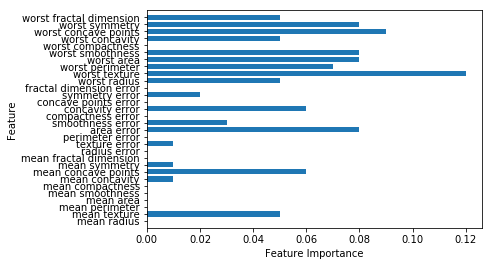

In [175]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, though the gradient boosting completely ignored some of the features.  
As both gradient boosting and random forests perform well on similar kinds of data, a common approach is to first try random forests, which work quite robustly.  
If random forests work well but prediction time is at a premium, or it is important to squeeze out the last percentage of accuracy from the machine learning model, moving to gradient boosting often helps.  
If you want to apply gradient boosting to a large-scale problem, it might be worth looking into the [xgboost package](https://xgboost.readthedocs.io/en/latest/) and its Python interface, which at the time of writing is faster (and sometimes easier to tune) than the `scikit-learn` implementation of gradient boosting on many datasets.

##### Strengths, weaknesses, and parameters

Gradient boosted decision trees are among the most powerful and widely used models for supervised learning.  
Their main drawback is that they require careful tuning of the parameters and may take a long time to train.  
Similarly to other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features.  
As with other tree-based models, it also often does not work well on high-dimensional sparse data.  
The main parameters of gradient boosted tree models are the number of trees, `n_estimators`, and the `learning_rate`, which controls the degree to which each tree is allowed to correct the mistakes of the previous trees.  
These two parameters are highly interconnected, as a lower `learning_rate` means that more trees are needed to build a model of similar complexity.  
In contrast to random forests, where a higher `n_estimators` value is always better, increasing `n_estimators` in gradient boosting leads to a more complex model, which may lead to overfitting.  
A common practice is to fit `n_estimators` depending on the time and memory budget, and then search over different `learning_rates`.  
Another important parameter is `max_depth` (or alternatively `max_leaf_nodes`), to reduce the complexity of each tree.  
Usually `max_depth` is set very low for gradient boosted models, often not deeper than five splits.

### Kernelized Support Vector Machines

The next type of supervised model we will discuss is [kernelized support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine).  
We explored the use of linear support vector machines for classification in “Linear models for classification”.  
[Kernelized support vector machines](https://en.wikipedia.org/wiki/Kernel_method) (often just referred to as SVMs) are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space.    
While there are support vector machines for classification and regression, we will restrict ourselves to the classification case, as implemented in [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC).  
Similar concepts apply to support vector regression, as implemented in [SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR).  
The math behind kernelized support vector machines is a bit involved, and is beyond the scope of this book.  
You can find the details in Chapter 12 of Hastie, Tibshirani, and Friedman’s [The Elements of Statistical Learning](http://www.web.stanford.edu/~hastie/ElemStatLearn/).  
However, we will try to give you some sense of the idea behind the method.

#### Linear models and nonlinear features

As you saw in Figure 2-15, linear models can be quite limiting in low-dimensional spaces, as lines and hyperplanes have limited flexibility.  
One way to make a linear model more flexible is by adding more features—for example, by adding interactions or polynomials of the input features.  
Let’s look at the synthetic dataset we used in “Feature importance in trees” (see Figure 2-29):

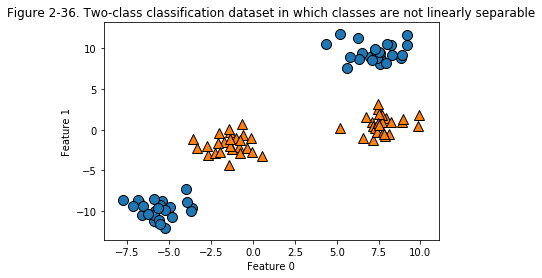

In [176]:
X, y = make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Figure 2-36. Two-class classification dataset in which classes are not linearly separable")

A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset:

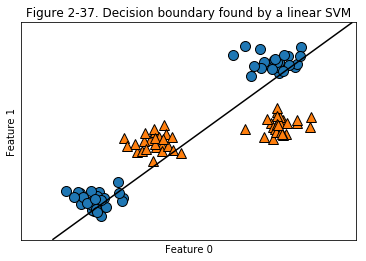

In [177]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Figure 2-37. Decision boundary found by a linear SVM")

Now let’s expand the set of input features, say by also adding `feature1**2`, the square of the second feature, as a new feature.  
Instead of representing each data point as a two-dimensional point, (`feature0`, `feature1`), we now represent it as a three-dimensional point, (`feature0`, `feature1`, `feature1**2`).  
This new representation is illustrated in Figure 2-38 in a three-dimensional scatter plot:

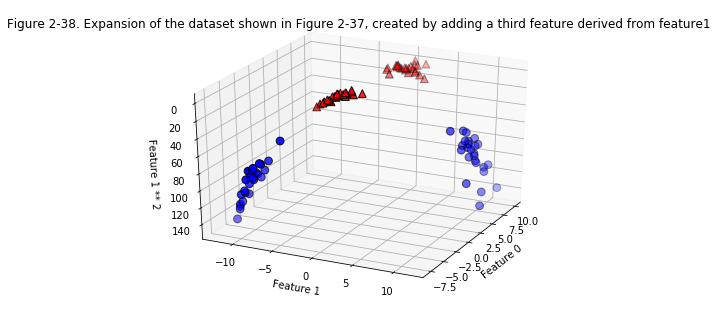

In [178]:
# Add the squared second feature.
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
# Visualize in 3 dimensions.
ax = Axes3D(figure, elev=-152, azim=-26)
# First, plot all of the points with y == 0, then all with y == 1.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
# https://stackoverflow.com/questions/38271945/applications-of-tilde-operator-in-python?noredirect=1&lq=1
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.title("Figure 2-38. Expansion of the dataset shown in Figure 2-37, created by adding a third feature derived from feature1")

In the new representation of the data, it is now indeed possible to separate the two classes using a linear model, a plane in three dimensions.  
We can confirm this by fitting a linear model to the augmented data:

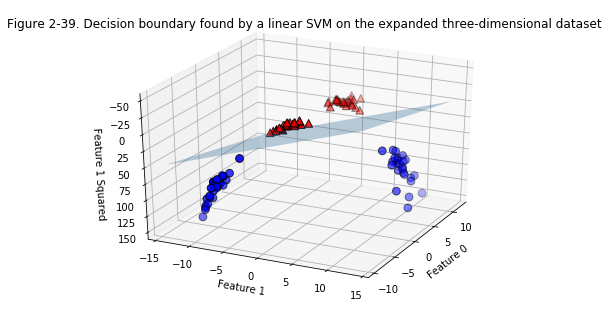

In [179]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 Squared")
plt.title("Figure 2-39. Decision boundary found by a linear SVM on the expanded three-dimensional dataset")

As a function of the original features, the linear SVM is not actually linear anymore.  
It isn't a line, but more of an ellipse, as you can see from the plot created below (Figure 2-40):

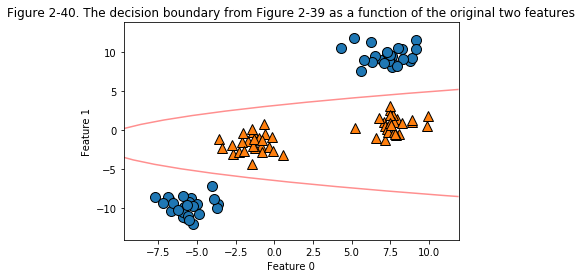

In [180]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Figure 2-40. The decision boundary from Figure 2-39 as a function of the original two features")

#### The kernel trick

The lesson here is that adding nonlinear features to the representation of our data can make linear models much more powerful.  
However, often we don’t know which features to add, and adding many features (like all possible interactions in a 100-dimensional feature space) might make computation very expensive.  
Luckily, there is a clever mathematical trick that allows us to learn a classifier in a higher-dimensional space without actually computing the new, possibly very large representation.  
This is known as the [kernel trick](https://en.wikipedia.org/wiki/Kernel_method), and it works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion.  
There are two ways to map your data into a higher-dimensional space that are commonly used with support vector machines:  
1) The [polynomial kernel](https://en.wikipedia.org/wiki/Polynomial_kernel), which computes all possible polynomials up to a certain degree of the original features (like `feature1 ** 2 * feature2 ** 5`).  
2) The [radial basis function (RBF) kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel), also known as the Gaussian kernel.  
The Gaussian kernel is a bit harder to explain, as it corresponds to an infinite-dimensional feature space.  
One way to explain the Gaussian kernel is that it considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees.  
In practice, the mathematical details behind the kernel SVM are not that important, though, and how an SVM with an RBF kernel makes a decision can be summarized quite easily—we’ll do so in the next section.

#### Understanding SVMs

During training, the SVM learns how important each of the training data points is to represent the decision boundary between the two classes.  
Typically only a subset of the training points matter for defining the decision boundary: the ones that lie on the border between the classes.  
These are called support vectors and give the support vector machine its name.  
To make a prediction for a new point, the distance to each of the support vectors is measured.  
A classification decision is made based on the distances to the support vector, and the importance of the support vectors that was learned during training (stored in the `dual_coef_` attribute of `SVC`).

The distance between data points is measured by the Gaussian kernel:  

$k_{rbf}(x_1, x_2) = exp (–ɣ ǁ x_1 - x_2 ǁ^2)$

Here, $x_1$ and $x_2$ are data points, $ǁ x_1 - x_2 ǁ$ denotes [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance), and $ɣ$ (gamma) is a parameter that controls the width of the Gaussian kernel.  
Figure 2-41 shows the result of training a support vector machine on a two-dimensional two-class dataset.  
The decision boundary is shown in black, and the support vectors are larger points with the wide outline.  
The following code creates this plot by training an SVM on the `forge` dataset:

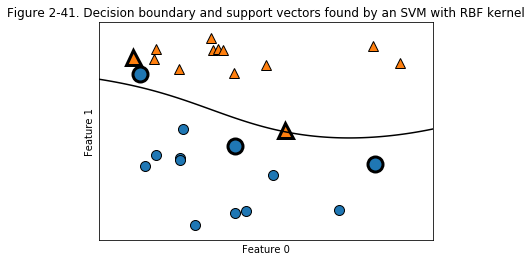

In [181]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Plot support vectors:
sv = svm.support_vectors_
# Class labels of support vectors are given by the sign of the dual coefficients:
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Figure 2-41. Decision boundary and support vectors found by an SVM with RBF kernel")

In this case, the SVM yields a very smooth and nonlinear (not a straight line) boundary.  
We adjusted two parameters here: the `C` parameter and the `gamma` parameter, which we will now discuss in detail.

#### Tuning SVM parameters

The `gamma` parameter is the one shown in the formula given in the previous section, which corresponds to the inverse of the width of the Gaussian kernel.  
Intuitively, the `gamma` parameter determines how far the influence of a single training example reaches, with low values corresponding to a far reach, and high values to a limited reach.  
In other words, the wider the radius of the Gaussian kernel, the further the influence of each training example.  
The `C` parameter is a [regularization parameter](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29), similar to that used in the linear models.  
It limits the importance of each point (or more precisely, their `dual_coef_`).  
Let’s have a look at what happens when we vary these parameters (Figure 2-42):

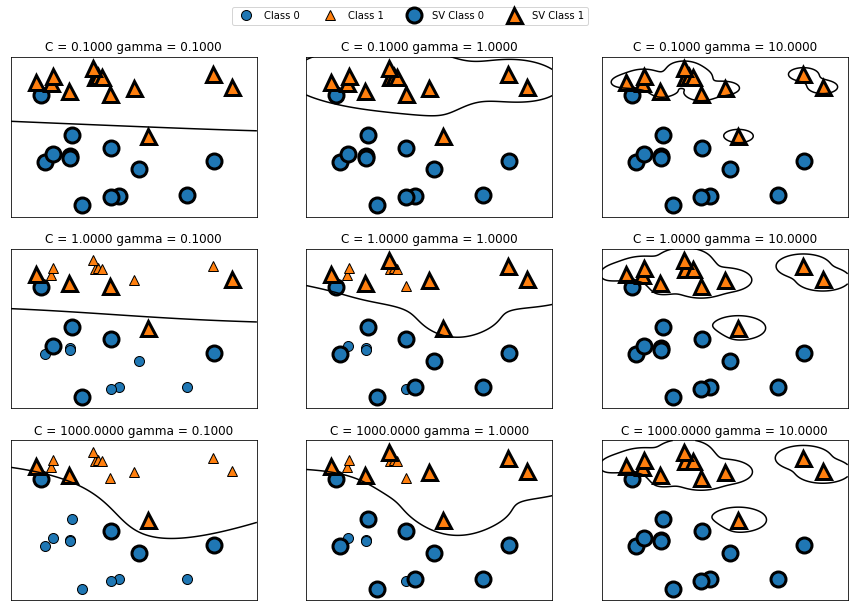

In [182]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["Class 0", "Class 1", "SV Class 0", "SV Class 1"], ncol=4, loc=(0.9, 1.2))

Going from left to right, we increase the value of the parameter `gamma` from 0.1 to 10.  
A small `gamma` means a large radius for the Gaussian kernel, which means that many points are considered close by.  
This is reflected in very smooth decision boundaries on the left, and boundaries that focus more on single points further to the right.  
A low value of `gamma` means that the decision boundary will vary slowly, which yields a model of low complexity, while a high value of `gamma` yields a more complex model.  
Going from top to bottom, we increase the `C` parameter from 0.1 to 1000.  
As with the linear models, a small `C` means a very restricted model, where each data point can only have very limited influence.  
You can see that at the top left the decision boundary looks nearly linear, with the misclassified points barely having any influence on the line.  
Increasing `C`, as shown on the bottom left, allows these points to have a stronger influence on the model and makes the decision boundary bend to correctly classify them.

Let’s apply the `RBF` kernel SVM to the Breast Cancer dataset.  
By default, `C=1` and `gamma=1/n_features`:

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on the training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on the test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on the training set: 1.00
Accuracy on the test set: 0.63


The model overfits quite substantially, with a perfect score on the training set and only 63% accuracy on the test set.  
While SVMs often perform quite well, they are very sensitive to the settings of the parameters and to the scaling of the data.  
In particular, they require all the features to vary on a similar scale.  
Let’s look at the minimum and maximum values for each feature, plotted in log-space (Figure 2-43):

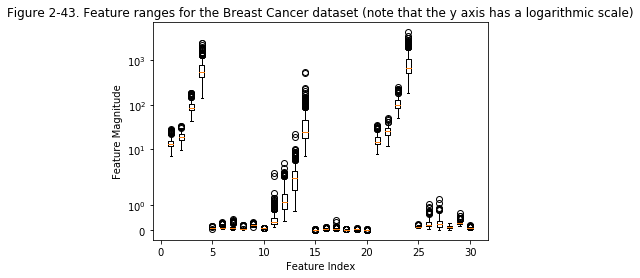

In [184]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("Symlog")
plt.xlabel("Feature Index")
plt.ylabel("Feature Magnitude")
plt.title("Figure 2-43. Feature ranges for the Breast Cancer dataset (note that the y axis has a logarithmic scale)")

From this plot we can determine that features in the Breast Cancer dataset are of completely different orders of magnitude.  
This can be somewhat of a problem for other models (like linear models), but it has devastating effects for the kernel SVM.  
Let’s examine some ways to deal with this issue.

#### Preprocessing data for SVMs

One way to resolve this problem is by rescaling each feature so that they are all approximately on the same scale.  
A common rescaling method for kernel SVMs is to scale the data such that all features are between 0 and 1.  
We will see how to do this using the `MinMaxScaler` preprocessing method in Chapter 3, where we’ll give more details.  
For now, let’s do this “by hand”:

In [185]:
# Compute the minimum value per feature on the training set:
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set:
range_on_training = (X_train - min_on_training).max(axis=0)
# Subtract the min, and divide by range so that min=0 and max=1 for each feature:
X_train_scaled = (X_train - min_on_training) / range_on_training 

print("Minimum for each feature: \n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature: \n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature: 
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [186]:
# Use the same transformation on the test set with min and range on the training set:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [187]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on the training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on the training set: 0.948
Accuracy on the test set: 0.951


As you can see, scaling the data made a huge difference.  
Now we are actually in an underfitting regime, where training and test set performance are quite similar but further away from 100% accuracy.  
From here, we can try increasing either `C` or `gamma` to fit a more complex model.  
For example:

In [188]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on the training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on the training set: 0.988
Accuracy on the test set: 0.972


Here, increasing `C` allows us to improve the model significantly, resulting in 97.2% accuracy.

#### Strengths, weaknesses, and parameters

Kernelized support vector machines are powerful models and perform well on a variety of datasets.  
SVMs allow for complex decision boundaries, even if the data has only a few features.  
They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.  
Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.  
Another downside of SVMs is that they require careful preprocessing of the data and tuning of the parameters.  
This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.  
Furthermore, SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

Still, it might be worth trying SVMs, particularly if all of your features represent measurements in similar units (e.g., all are pixel intensities) and they are on similar scales.
The important parameters in kernel SVMs are the regularization parameter `C`, the choice of the kernel, and the kernel-specific parameters.  
Although we primarily focused on the `RBF` kernel, other choices are available in scikit-learn.  
The `RBF` kernel has only one parameter, `gamma`, which is the inverse of the width of the Gaussian kernel.  
`gamma` and `C` both control the complexity of the model, with large values in either resulting in a more complex model.  
Therefore, good settings for the two parameters are usually strongly correlated, and `C` and `gamma` should be adjusted together.

### Neural Networks (Deep Learning)

A family of algorithms known as neural networks has recently seen a revival under the name “deep learning.”  
While deep learning shows great promise in many machine learning applications, deep learning algorithms are often tailored very carefully to a specific use case.  
Here, we will only discuss some relatively simple methods, namely multilayer perceptrons for classification and regression, that can serve as a starting point for more involved deep learning methods.  
[Multilayer perceptrons (MLPs)](https://en.wikipedia.org/wiki/Multilayer_perceptron) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.  

#### The neural network model

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.  
Remember that the prediction by a linear regressor is given as:  

$ŷ = w[0] * x[0] + w[1] * x[1] + \ldots + w[p] * x[p] + b$  

In plain English, $ŷ$ is a weighted sum of the input features $x[0]$ to $x[p]$, weighted by the learned coefficients $w[0]$ to $w[p]$.  
We could visualize this graphically as shown in Figure 2-44: 

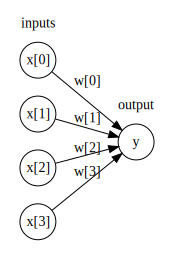

In [189]:
display(mglearn.plots.plot_logistic_regression_graph())

Here, each node on the left represents an input feature, the connecting lines represent the learned coefficients, and the node on the right represents the output, which is a weighted sum of the inputs.  
In an MLP this process of computing weighted sums is repeated multiple times, first computing hidden units that represent an intermediate processing step, which are again combined using weighted sums to yield the final result (Figure 2-45):

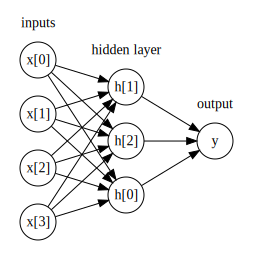

In [190]:
display(mglearn.plots.plot_single_hidden_layer_graph())

This model has a lot more coefficients (also called weights) to learn: there is one between every input and every hidden unit (which make up the [hidden layer](http://standoutpublishing.com/g/hidden-layer.html)), and one between every unit in the hidden layer and the output.  
Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model truly more powerful than a linear model, we need one extra trick.  
After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result -- usually the rectifying nonlinearity (also known as [rectified linear unit or relu](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29)) or the [tangens hyperbolicus (tanh)](http://reference.wolfram.com/language/ref/Tanh.html).  
The result of this function is then used in the weighted sum that computes the output, $ŷ$.  
The two functions are visualized in Figure 2-46.  
The relu cuts off values below zero, while tanh saturates to –1 for low input values and +1 for high input values.  
Either nonlinear function allows the neural network to learn much more complicated functions than a linear model could:

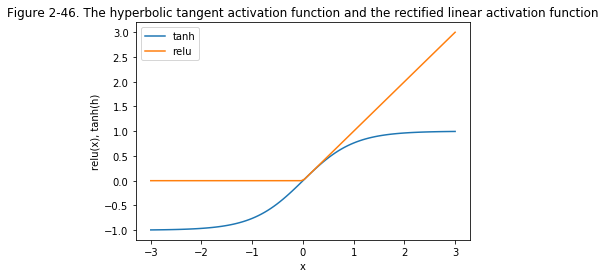

In [191]:
line = np.linspace (-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(h)")
plt.title("Figure 2-46. The hyperbolic tangent activation function and the rectified linear activation function")

For the small neural network pictured in Figure 2-45, the full formula for computing $ŷ$ in the case of regression would be (when using a tanh nonlinearity):  

$h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])$  

$h[1] = tanh(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3] + b[1])$  

$h[2] = tanh(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3] + b[2])$  

$ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b$  

Here, $w$ are the weights between the input $x$ and the hidden layer $h$, and $v$ are the weights between the hidden layer $h$ and the output $ŷ$.  
The weights $v$ and $w$ are learned from data, $x$ are the input features, $ŷ$ is the computed output, and $h$ are intermediate computations.  
An important parameter that needs to be set by the user is the number of nodes in the hidden layer.  
This can be as small as 10 for very small or simple datasets and as big as 10,000 for very complex data.  
It is also possible to add additional hidden layers, as shown in Figure 2-47:

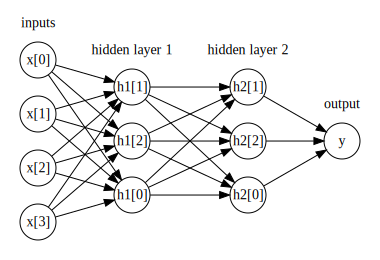

In [192]:
mglearn.plots.plot_two_hidden_layer_graph()

Having large neural networks made up of many of these layers of computation is what inspired the term "deep learning".

#### Tuning neural networks